# Projekt IAU  
## 3. časť - Strojové učenie
### Vypracovali: Marek Adamovič, Michal Pidanič
### Číslo datasetu: 32
### Podiel práce: 50/50

In [35]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## 1. 1R algoritmus
### Načítanie dát

In [36]:
df_train = (pd.read_csv("data/train_ready.csv", sep=',')).drop('Unnamed: 0', axis = 1)
df_test = (pd.read_csv("data/test_ready.csv", sep=',')).drop('Unnamed: 0', axis = 1)
df_train.tail()

,indicator,erytrocyty,smoker,weight,trombocyty,alp,hbver,etytr,relationship,leukocyty,ast,hematokrit,er-cv,hemoglobin,alt,age,race,blood_group,sex
7332,0.0,0.575754,1.0,0.711019,0.499028,0.829567,0.801791,0.665184,0.50,0.486833,0.472319,0.783965,0.339923,0.463351,0.815196,0.543468,0.0,0.142857,1.0
7333,0.0,0.430494,0.0,0.557357,0.536773,0.495379,0.355516,0.524090,0.00,0.380365,0.452176,0.398662,0.479772,0.359034,0.671064,0.818007,0.0,0.857143,0.0
7334,1.0,0.385569,0.0,0.426305,0.428256,0.115216,0.465090,0.557330,1.00,0.709329,0.549813,0.447231,0.422781,0.734668,0.520211,0.220231,0.0,1.000000,0.0
7335,0.0,0.349808,1.0,0.624799,0.543183,0.222387,0.632780,0.781543,0.25,0.345778,0.483406,0.398620,0.438654,0.262399,0.523668,0.263312,1.0,0.428571,0.0
7336,0.0,0.424664,1.0,0.468864,0.343344,0.175400,0.873242,0.836406,0.25,0.676886,0.506133,0.456904,0.446154,0.744521,0.587184,0.909949,0.5,0.428571,0.0


### 

### Hranice pre algoritmus
Pozrieme sa na 3 grafy, ktoré v minulom zadaní preukázali najvyššiu závislosť s indikátorom.

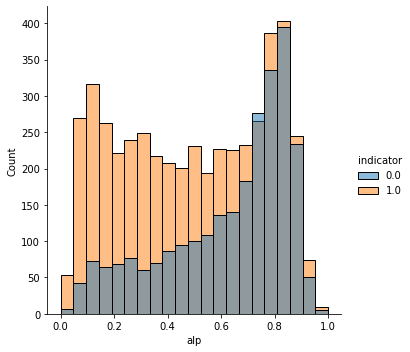

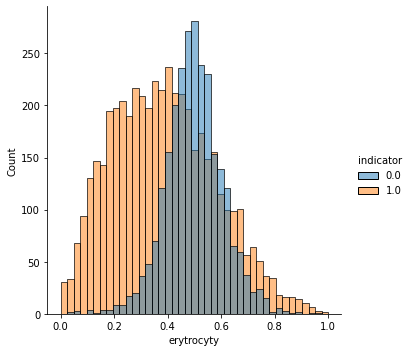

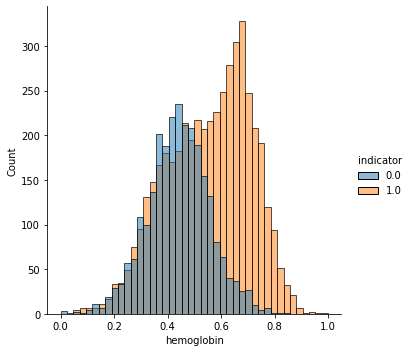

In [37]:
sns.displot(data = df_train, x = "alp", hue="indicator")
sns.displot(data = df_train, x = "erytrocyty", hue="indicator")
sns.displot(data = df_train, x = "hemoglobin", hue="indicator")

Teraz si pre všetky zvolíme hranicu, podľa ktorej budeme klasifikovať.  Tú si vypočítame pomocou priemeru. Spriemerujeme hodnoty pre daný atribút v záznamoch s chorobou (indicator == 1) a taktiež v záznamoch bez choroby (indicator == 0). Stred medzi týmito priemermi bude našou hranicou.

In [38]:
a_mean_0 = df_train.alp[df_train.indicator == 0].mean()
a_mean_1 = df_train.alp[df_train.indicator == 1].mean()
a_limit = min(a_mean_0, a_mean_1) + abs(a_mean_0 - a_mean_1)/2
print("alp:\nPriemer bez choroby: ", a_mean_0, "\nPriemer s chorobou: ", a_mean_1, "\nNasa hranica: ", a_limit)

e_mean_0 = df_train.erytrocyty[df_train.indicator == 0].mean()
e_mean_1 = df_train.erytrocyty[df_train.indicator == 1].mean()
e_limit = min(e_mean_0, e_mean_1) + abs(e_mean_0 - e_mean_1)/2
print("erytrocyty:\nPriemer bez choroby: ", e_mean_0, "\nPriemer s chorobou: ", e_mean_1, "\nNasa hranica: ", e_limit)

h_mean_0 = df_train.hemoglobin[df_train.indicator == 0].mean()
h_mean_1 = df_train.hemoglobin[df_train.indicator == 1].mean()
h_limit = min(h_mean_0, h_mean_1) + abs(h_mean_0 - h_mean_1)/2
print("hemoglobin:\nPriemer bez choroby: ", h_mean_0, "\nPriemer s chorobou: ", h_mean_1, "\nNasa hranica: ", h_limit)

alp:
Priemer bez choroby:  0.6297486439034249 
Priemer s chorobou:  0.493344400446844 
Nasa hranica:  0.5615465221751345
erytrocyty:
Priemer bez choroby:  0.4982618423410998 
Priemer s chorobou:  0.38571843104408027 
Nasa hranica:  0.44199013669259
hemoglobin:
Priemer bez choroby:  0.4405415446602446 
Priemer s chorobou:  0.5519638365786657 
Nasa hranica:  0.4962526906194551


Teraz prejdeme dataset a každý záznam porovnáme s týmito troma hranicami. Keďže rovnomerne klasifikujeme podľa 3 atribútov, budeme klasifikovať na základe väčšiny (teda 2 z 3, resp. 3 z 3). Následne skontrolujeme našu presnosť podľa indikátoru.

In [39]:
def r1_algo(df):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for row in df.iterrows():
        #counter for results of 3 atrributes tests
        isIll = 0

        #test alp limit
        if(row[1].alp < a_limit):
            isIll+=1
        else:
            isIll-=1

        #test erytrocyty limit
        if(row[1].erytrocyty < e_limit):
            isIll+=1
        else:
            isIll-=1

        #test hemoglobin limit
        if(row[1].alp > h_limit):
            isIll+=1
        else:
            isIll-=1

        #make our guess
        if(isIll > 0):
            guess = 1
        else:
            guess = 0

        #compare our guess with real indicator
        if(row[1].indicator == guess and guess == 1):
            true_positives += 1
        elif(row[1].indicator == guess and guess == 0):
            true_negatives += 1
        elif(row[1].indicator != guess and guess == 1):
            false_positives += 1
        elif(row[1].indicator != guess and guess == 0):
            false_negatives += 1
        else:
            print("Something went wrong")

    print("True positives: ", true_positives)
    print("True negatives: ", true_negatives)
    print("False positives: ", false_positives)
    print("False negatives: ", false_negatives)
    print("Accuracy: ", (true_positives + true_negatives)/(true_positives + true_negatives + false_positives + false_negatives) * 100, "%")
    print("Precision: ", (true_positives)/(true_positives + false_positives) * 100, "%")
    print("Recall: ", (true_positives)/(true_positives + false_negatives) * 100, "%")

print("TRENOVACI DATASET:")
r1_algo(df_train)
print("\nTESTOVACI DATASET:")
r1_algo(df_test)

TRENOVACI DATASET:
True positives:  3078
True negatives:  1774
False positives:  834
False negatives:  1651
Accuracy:  66.1305710780973 %
Precision:  78.68098159509202 %
Recall:  65.0877563967012 %

TESTOVACI DATASET:
True positives:  785
True negatives:  392
False positives:  280
False negatives:  378
Accuracy:  64.14168937329701 %
Precision:  73.70892018779342 %
Recall:  67.49785038693035 %


## 2. Natrénovanie a vyhodnotenie klasifikátora strojového učenia
### Pripravenie dát pre rozhodovací strom

In [40]:
treeAlgo = tree.DecisionTreeClassifier()
x_train = df_train.drop("indicator", axis=1)
y_train = df_train["indicator"]

x_test = df_test.drop("indicator", axis=1)
y_test = df_test["indicator"]

### Použitie rozhodovacieho stromu pre naše dáta a jeho otestovanie

In [41]:
treeAlgo = treeAlgo.fit(x_train, y_train)

print("TRENOVACI DATASET:")
print("Accuracy: ", accuracy_score(treeAlgo.predict(x_train), y_train) * 100, "%")
print("Precision: ", precision_score(treeAlgo.predict(x_train), y_train) * 100, "%")
print("Recall: ", recall_score(treeAlgo.predict(x_train), y_train) * 100, "%")


print("\nTESTOVACI DATASET:")
print("Accuracy: ", accuracy_score(treeAlgo.predict(x_test), y_test) * 100, "%")
print("Precision: ", precision_score(treeAlgo.predict(x_test), y_test) * 100, "%")
print("Recall: ", recall_score(treeAlgo.predict(x_test), y_test) * 100, "%")

TRENOVACI DATASET:
Accuracy:  100.0 %
Precision:  100.0 %
Recall:  100.0 %

TESTOVACI DATASET:
Accuracy:  82.39782016348774 %
Precision:  82.7171109200344 %
Recall:  88.74538745387454 %


Z výsledkov vidíme, že rozhodovací strom dopadol oveľa lepšie ako náš 1R algoritmus.

### Vizualizácia pravidiel rozhodovacieho stromu

In [42]:
#graf odporúčame stiahnúť ako png, otvoriť a nazoomovať
plt.figure(figsize=(200,200))
tree.plot_tree(treeAlgo, fontsize=6)
plt.show()